---
# 1. 라이브러리 불러오기
----

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [130]:
import librosa # 음원 데이터 분석 라이브러리 
import librosa.display as dsp
from IPython.display import Audio # 음원을 파이썬 작업환경에서 띄우는 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

---
# 2. 데이터 불러오기
----

In [61]:
path = '/content/drive/MyDrive/Audio_Study/train/01/'
sample = os.listdir(path)

# 데이터 프레임 생성
train = pd.DataFrame(sample, columns = ['file_name'])
# label 생성
train['label'] = None
for i in range(len(train)):
  train['label'][i] = train['file_name'][i][0]  

train['label'] = train['label'].astype(int)
train

,file_name,label
0,0_01_33.wav,0
1,0_01_15.wav,0
2,0_01_1.wav,0
3,0_01_23.wav,0
4,0_01_18.wav,0
...,...,...
495,9_01_41.wav,9
496,9_01_28.wav,9
497,9_01_48.wav,9
498,9_01_9.wav,9


---
# 3. 오디오 시각화
----

### librosa

- 오디오 파일을 부동 소수점 시계열로 로드
- librosa로 데이터를 읽으면 데이터의 범위가 -1 ~ 1 사이로 정규화됨
- librosa의 입력에서 sr = None으로 지정하지 않고 임의의 sample_rate를 설정하면 load시 resamlpling을 수행

- Parameters 
  - 경로
  - sr = (number) 데이터 샘플링 속도, None의 경우 기본 속도 사용
  - mono = (bool) 신호를 모노로 변환
  - offset = (float) 지정 시간 이후 읽기 시작(초)
  - duration = (float) 지정 시간 만큼의 오디오만 로드(초)
  - dtype = (numeric type) 데이터 유형
  - res_type = (str) 리샘플 유형

- Return
  - y : np.ndarray / 오디오 시계열, 다중 채널 지원
  - sr : number / 샘플링 속도

In [99]:
def get_audio(num = 0, idx = 0):
  path = '/content/drive/MyDrive/Audio_Study/train/01/'
  sample = os.listdir(path)
  temp = train[train.label == num].file_name
  file_name = temp[temp.index[idx]]
  
  root = path + file_name  # audio 파일 경로
  # audio wave이미지를 위해
  data, sample_rate = librosa.load(root)

  # Audio wave plot
  dsp.waveshow(data, sr = sample_rate)
  plt.show()

  return Audio(data=data,rate=sample_rate) # audio 위젯 

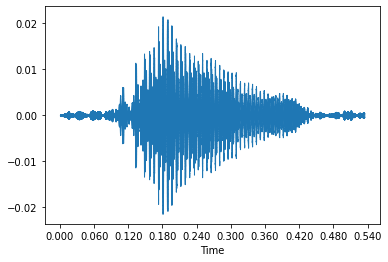

In [100]:
get_audio(1, 12)

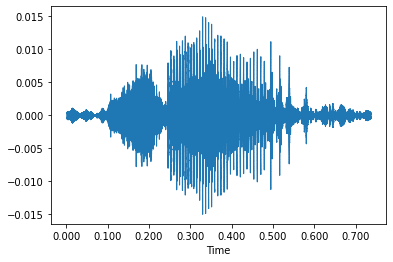

In [157]:
get_audio(0, 15)

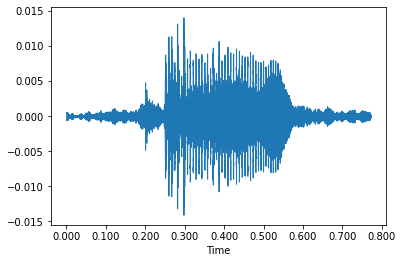

In [158]:
get_audio(5, 5)

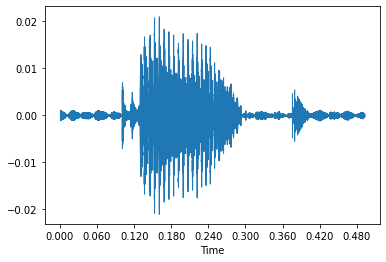

In [159]:
get_audio(8, 41)

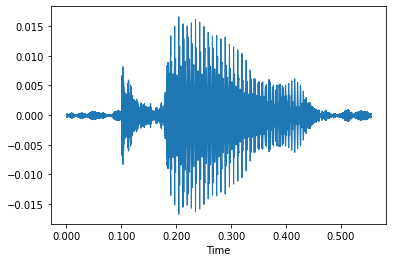

In [160]:
get_audio(2, 15)

---
# 4. 퓨리에 변환
---

- 주파수(frequency)성분을 뽑아내기 위해서 퓨리에 변환(Fourier Transform) 필요

- 즉, 입력 신호를 다양한 주파수를 가지는 주기함수들로 분해하는 것
- 주기함수들을 분해함으로써 음성 데이터에서 노이즈 및 배경 소리로 부터 실제로 유용한 소리의 데이터를 추출할 수 있음

In [125]:

path = '/content/drive/MyDrive/Audio_Study/train/01/'
sample = os.listdir(path)
temp = train[train.label == 0].file_name
file_name = temp[temp.index[0]]

root = path + file_name  # audio 파일 경로
# audio wave이미지를 위해
data, sample_rate = librosa.load(root)

fft = np.fft.fft(data) # 퓨리에 변환
magnitude = np.abs(fft) # 절대값 계산
# 구간 내 숫자를 균일하게 채움 
frequency = np.linspace(0, sample_rate, len(magnitude))  # 구간 시작점, 구간 끝점, 구간 내 숫자 개수

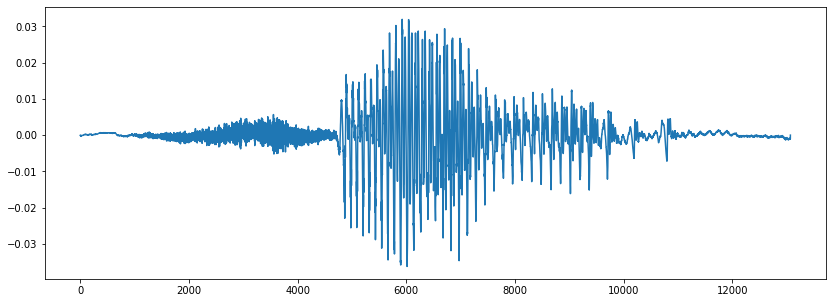

In [126]:
fig = plt.figure(figsize = (14,5))
plt.plot(data)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


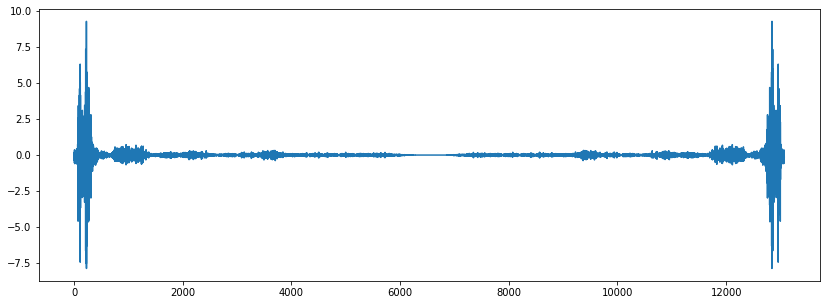

In [127]:
fig = plt.figure(figsize = (14,5))
plt.plot(fft)

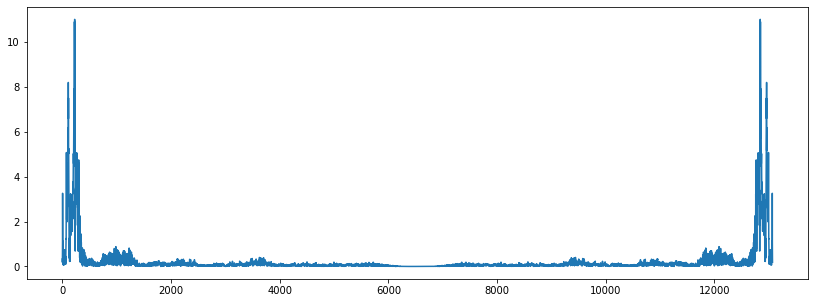

In [128]:
fig = plt.figure(figsize = (14,5))
plt.plot(magnitude)

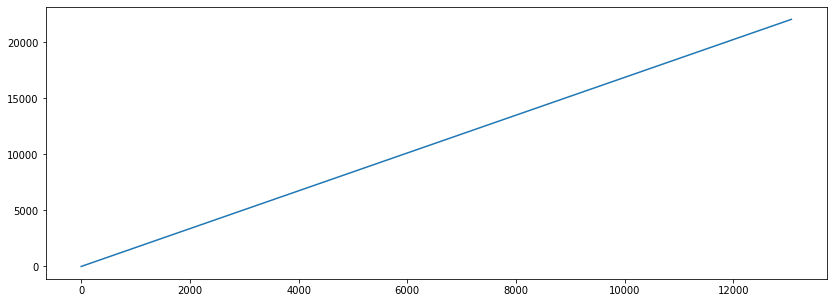

In [129]:
fig = plt.figure(figsize = (14,5))
plt.plot(frequency)

In [108]:
data

array([-8.57812047e-05, -1.33301539e-04, -1.15329894e-04, ...,
       -1.00493350e-03, -1.01940357e-03,  0.00000000e+00], dtype=float32)

In [134]:
def fourier_trans(num = 0, idx = 0):
  path = '/content/drive/MyDrive/Audio_Study/train/01/'
  sample = os.listdir(path)
  temp = train[train.label == num].file_name
  file_name = temp[temp.index[idx]]
  
  root = path + file_name  # audio 파일 경로
  # audio wave이미지를 위해
  data, sample_rate = librosa.load(root)

  fft = np.fft.fft(data) # 퓨리에 변환
  magnitude = np.abs(fft) # 절대값 계산
  # 구간 내 숫자를 균일하게 채움 
  frequency = np.linspace(0, sample_rate, len(magnitude)) # 구간 시작점, 구간 끝점, 구간 내 숫자 개수

  # 주파수 스펙트럼은 중앙을 기준으로 대칭이 되기 때문에 반만 계산
  left_frequency = frequency[:int(len(frequency)/2)]
  left_magnitude = magnitude[:int(len(magnitude)/2)]

  fig = plt.figure(figsize = (14,5))
  plt.plot(left_frequency, left_magnitude)
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.title(f"Fourier transform of audio label {num}")
  plt.show()

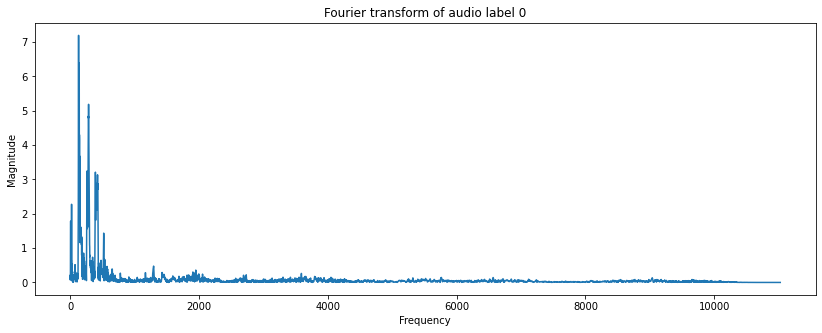

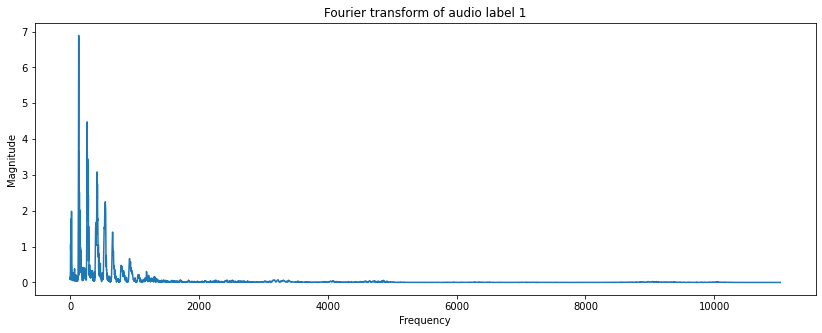

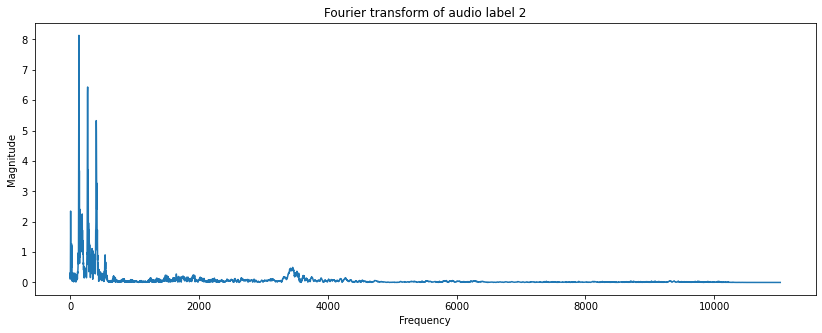

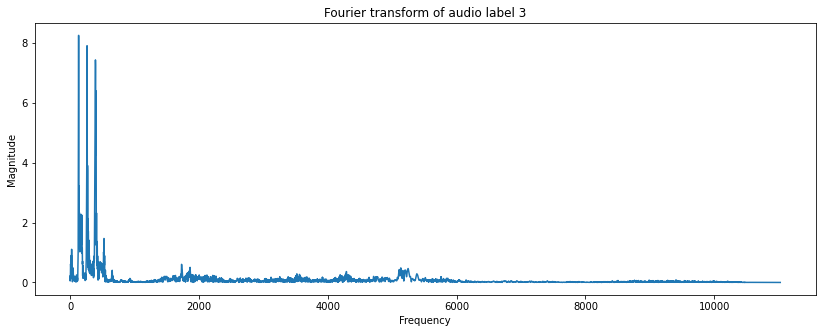

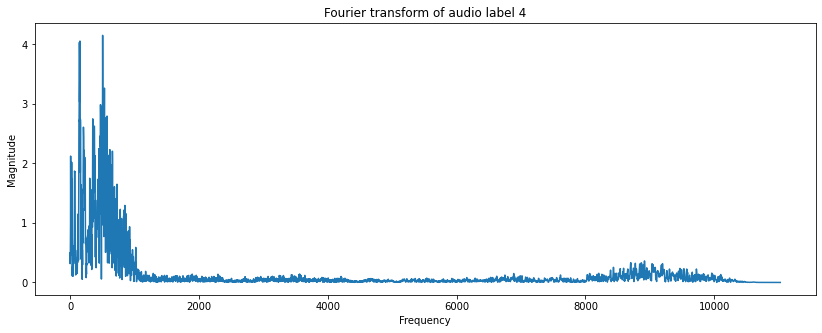

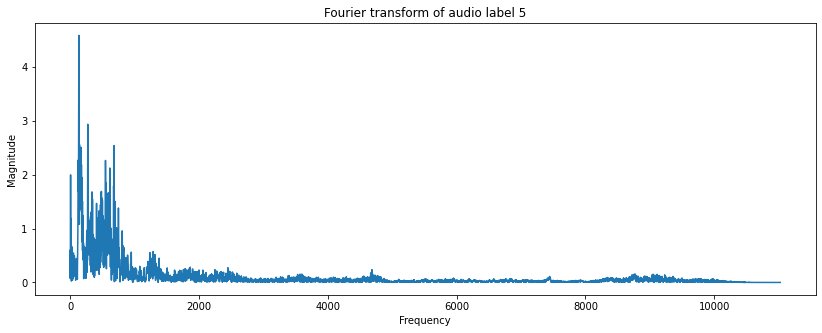

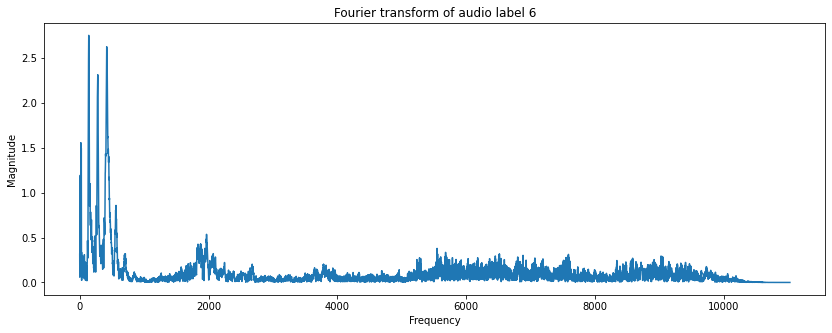

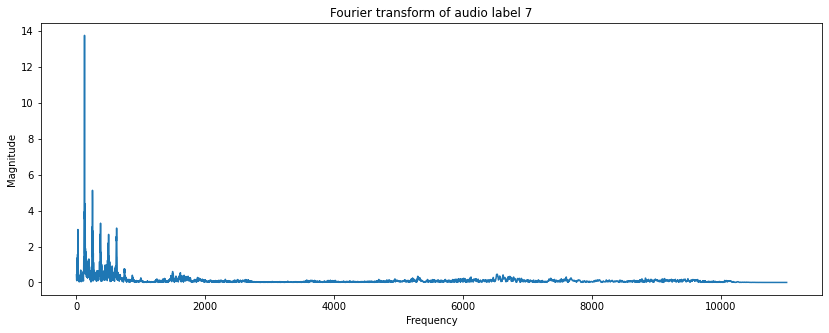

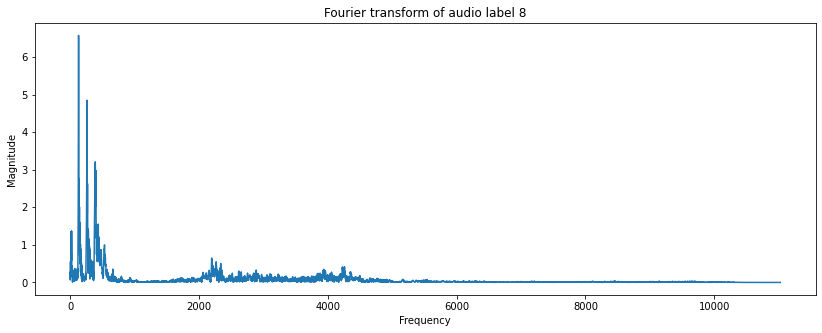

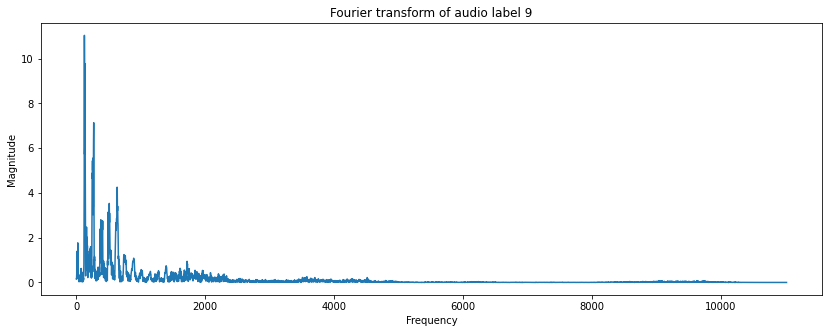

In [135]:
for i in range(0,10):
    fourier_trans(i, 5)

---
# 5. Mel Spectrogram
---



- Spectogram은 소리나 파동을 시각화하여 파악하기 위한 도구로, 파형(waveform)과 스펙트럼(spectrum)의 특징이 조합

- Mel Spetrogram은 주파수를 mel-scale로 변환한 형태

- 낮은 주파수를 높은 주파수보다 더 예민하게 받아들이므로 이 주파수를 mel scale로 볼 수 있게 하는 방법

- librosa.feature.melspectrogram parameter
  - y = (np.ndarray) 오디오 시계열, 다중 채널 지원
  - sr = (number) 샘플링 속도
  - S = (np.ndarray) 스펙토그램
  - hop_length = (int > 0) window 간의 거리 / 연속 프레임 사이의 샘플 수 
  - win_length = (int M= n_fft) 윈도우 길이, 지정하지 않으면 win_length = n_fft
  - n_mels = (int > 0) 생성할 멜 밴드 수
  - fmin = (float >= 0) 최저 주파수
  - fmax = (float >= 0) 최고 주파수, None일 경우 fmax = sr / 2.0
  - n_fft = (int > 0) 
    - frame의 length를 결정하는 파라미터 
    - n_fft를 설정하면 window size가 디폴트 값으로 n_fft로 설정
    - 
          사람의 목소리는 대부분 16000Hz 안에 포함
          일반적으로 자연어 처리에서는 음성을 25m의 크기가 기본
          ex. 16000Hz인 음성에서는 25m의 음성의 크기를 가지고 있으면 
          n_fft는 16000 * 0.025 = 400 (sampling rate * frame_length = n_fft)

- return 
 - S = (np.ndarray) 멜 스펙토그램


 frame의 length를 결정하는 파라미터. n_fft를 설정하면 window size가 디폴트 값으로 n_fft가 됩니다.

사람의 목소리는 대부분 16000Hz 안에 포함이 되는데, 일반적으로 자연어 처리에서는 음성을 25m의 크기를 기본으로 하고 있습니다.

(ex. 16000Hz인 음성에서는 25m의 음성의 크기를 가지고 있으면 n_fft는 16000 * 0.025 = 400 (sampling rate * frame_length = n_fft)가 됩니다.)

In [153]:
def mel(num = 0, idx = 0,frame_length = 0.025, frame_stride = 0.010):
  path = '/content/drive/MyDrive/Audio_Study/train/01/'
  sample = os.listdir(path)
  temp = train[train.label == num].file_name
  file_name = temp[temp.index[idx]]
  
  root = path + file_name  # audio 파일 경로
  # audio wave이미지를 위해
  data, sample_rate = librosa.load(root)

  input_nfft = int(round(sample_rate*frame_length))
  input_stride = int(round(sample_rate*frame_stride))
  
  S = librosa.feature.melspectrogram(y=data, n_mels=100, n_fft=input_nfft, hop_length=input_stride)
  
  print("Wav length: {}, Mel_S shape:{}".format(len(data)/sample_rate, np.shape(S)))
  
  S_dB  = librosa.power_to_db(S, ref=np.max)
  fig = plt.figure(figsize = (14,5))
  librosa.display.specshow(S_dB, 
                            sr=sample_rate, 
                            hop_length=input_stride,
                            x_axis='time',
                            y_axis='log')
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar(format='%+2.0f dB')
  plt.title(f"Mel spectrogram of audio label {num}")
  plt.show()

Wav length: 0.5927437641723357, Mel_S shape:(100, 60)


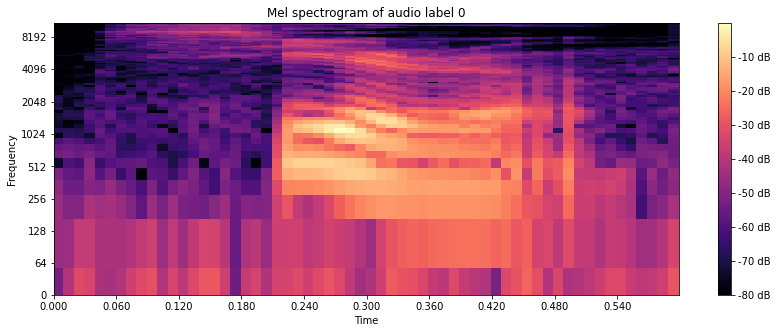

Wav length: 0.44253968253968257, Mel_S shape:(100, 45)


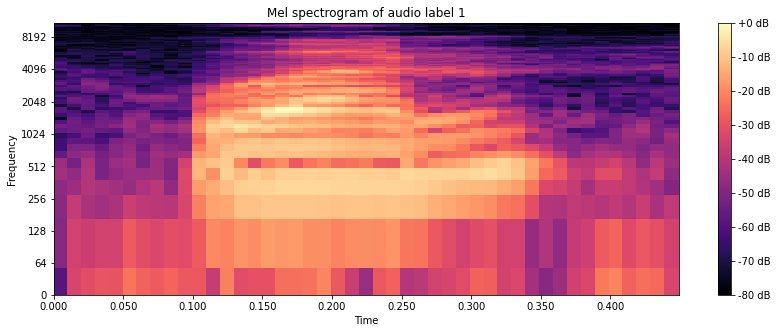

Wav length: 0.4852154195011338, Mel_S shape:(100, 49)


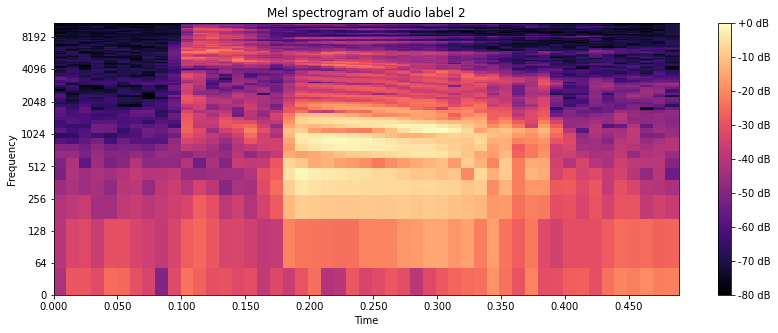

Wav length: 0.6177777777777778, Mel_S shape:(100, 62)


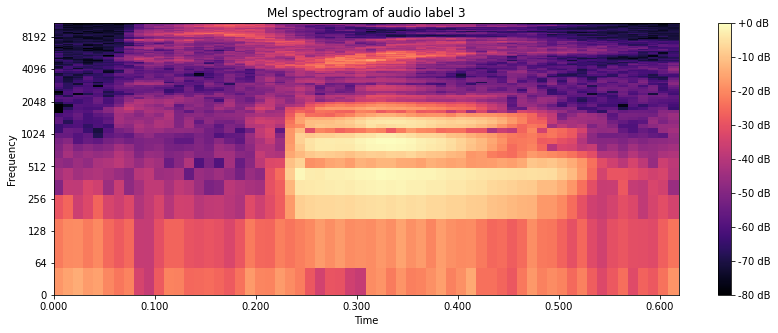

Wav length: 0.5939229024943311, Mel_S shape:(100, 60)


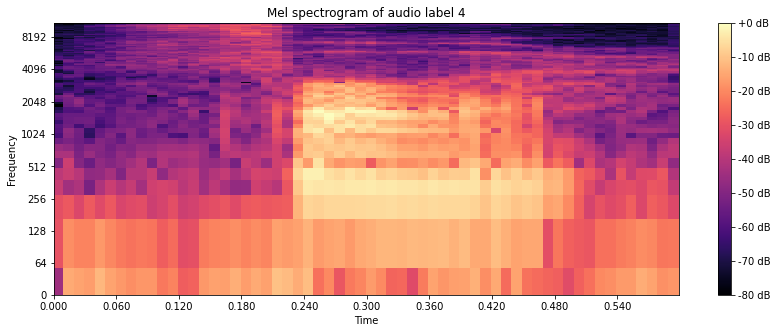

Wav length: 0.6347845804988662, Mel_S shape:(100, 64)


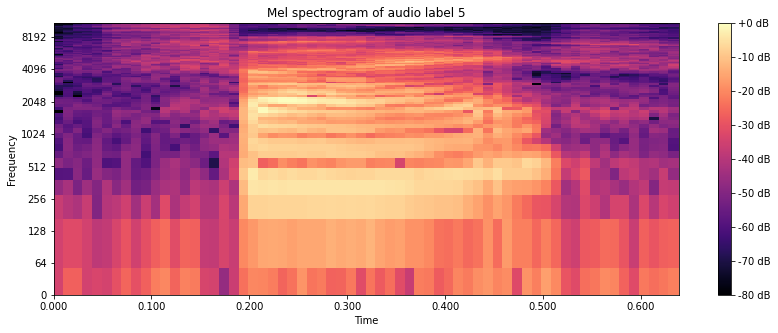

Wav length: 0.7047619047619048, Mel_S shape:(100, 71)


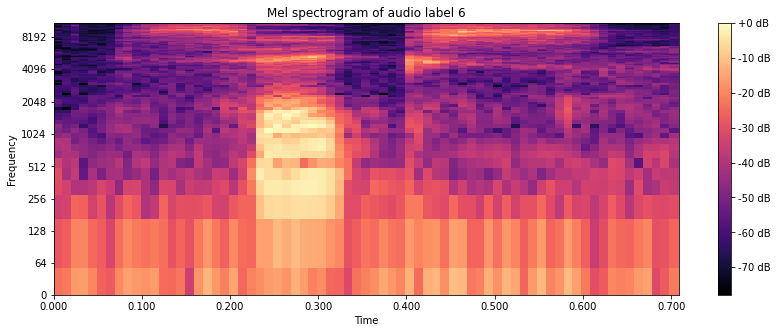

Wav length: 0.6853968253968254, Mel_S shape:(100, 69)


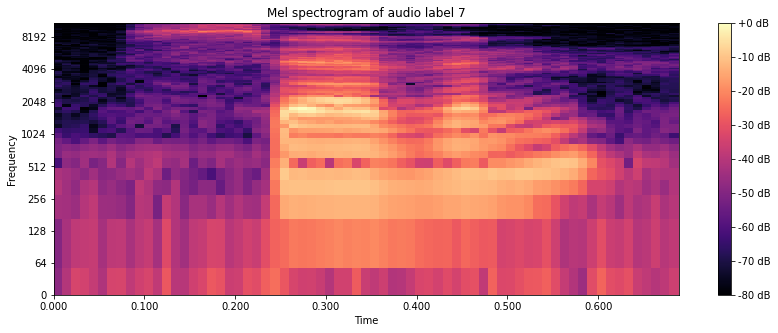

Wav length: 0.5890702947845805, Mel_S shape:(100, 60)


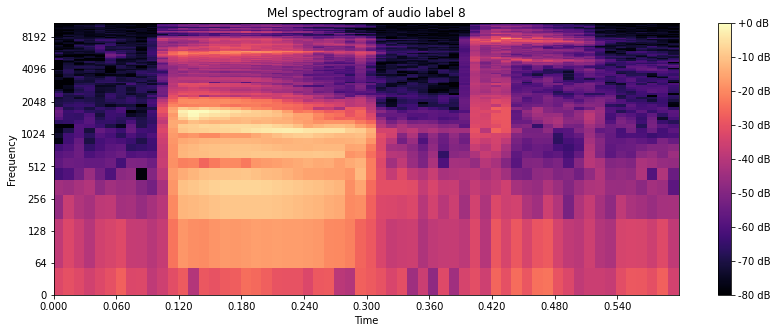

Wav length: 0.6583673469387755, Mel_S shape:(100, 66)


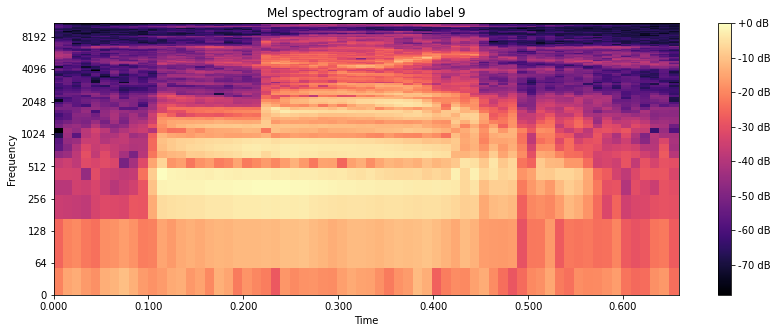

In [155]:
for i in range(0,10):
    mel(i)

In [148]:
input_nfft

551